# MRI and TSV preprocessing 

## Imports

The data will be processed using 

In [1]:
import os       # using operating system dependent functionality (folders)
import glob
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
#import SimpleITK as sitk
import nibabel
import skimage

import sys
sys.path.insert(0, '../') # path to functions
from brainspin import file_handler as fh # 
from brainspin import mold #
from brainspin import carve
from brainspin.file_handler import Config

## Load files

Use the config pathways for the different datasets

In [2]:
config = Config()
root_mri_directory = config.get_directory('root_mri_directory')

In [3]:
tsv_pattern = os.path.join(root_mri_directory, '**/*.tsv')
tsv_files = glob.glob(tsv_pattern, recursive=True)


In [99]:
#tsv_files

In [5]:
dataframe_example = pd.read_csv(tsv_files[0], sep='\t')

In [6]:
dataframe_example

,participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,MeanMotion,DeepWM_B,DeepWM_L,DeepWM_R
0,StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,n lesions (integer),mm,SD/mean,SD/mean,SD/mean
1,sub-100151241_1,ASL_1,TimePoint_1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,sub-100151242_1,ASL_1,TimePoint_1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,sub-10015124_1,ASL_1,TimePoint_1,3,1,0.56794,0.47687,0.34052,0.40997,0.7542,4.889,16,0.16098,10.9918,10.8279,11.0443
4,sub-10015124_2,ASL_1,TimePoint_2,3,1,0.56664,0.4727,0.34156,0.41034,0.75265,7.444,19,0.17257,7.9018,9.0773,6.8846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,sub-19995714_2,ASL_1,TimePoint_2,1300,1,0.63999,0.54546,0.42336,0.3978,0.73685,1.735,23,0.09423,20.3281,16.4068,25.2544
1667,sub-199968291_1,ASL_1,TimePoint_1,1301,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,sub-199968292_1,ASL_1,TimePoint_1,1302,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669,sub-19996829_1,ASL_1,TimePoint_1,1303,1,0.52206,0.45926,0.4026,0.37723,0.70909,15.875,41,NaN,NaN,NaN,NaN


In [7]:
mri_pattern = os.path.join(root_mri_directory, '**/*.gz')
gz_files = glob.glob(mri_pattern, recursive=True)

In [100]:
#gz_files

In [101]:
# here we can use something not in the base environment just to check that these files exist correctly
# A path to an mrid brain .nii image:
t1_fn = gz_files[2]

t1_img = nibabel.load(t1_fn)
# now display aspects of it

In [102]:
t1_img.shape

(64, 64, 36)

In [103]:
t1_hdr = t1_img.header
print(t1_hdr)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 64 64 36  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         3.4374995  3.4374998  4.4999995  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'spm - realigned'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0026321653
quatern_c       : 0.9963083
quatern_d       : 0.08203961
qoffset_x       : 109.81204
qoff

In [12]:
t1_hdr.keys()


['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [57]:
# this may tell us the dimensions, which here we should note are 64,64,36 for 3 dimensions
t1_hdr['dim']

array([ 3, 64, 64, 36,  1,  1,  1,  1], dtype=int16)

In [13]:
t1_data = t1_img.get_fdata()
t1_data


array([[[            nan, -3.42402107e-10, -4.63615919e-08, ...,
                     nan,             nan,             nan],
        [            nan,  1.31429672e-07, -5.62228990e-07, ...,
         -2.27385304e-13,  7.88946816e-14,             nan],
        [            nan,  1.45753887e-07,  1.11551583e-06, ...,
          2.96697259e-12, -1.00840061e-12,             nan],
        ...,
        [-3.61755338e-05,  8.27072199e-06, -1.99562564e-05, ...,
                     nan,             nan,             nan],
        [-2.48657016e-05,  1.42740519e-05, -4.04179518e-05, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan, -5.69614897e-08,  1.26840484e-06, ...,
                     nan,             nan,             nan],
        [            nan, -2.45101728e-06,  1.73289118e-05, ...,
          1.13680558e-11, -3.90688220e

In [14]:
x_slice = t1_data[9, :, :]
y_slice = t1_data[:, 19, :]
z_slice = t1_data[:, :, 9]

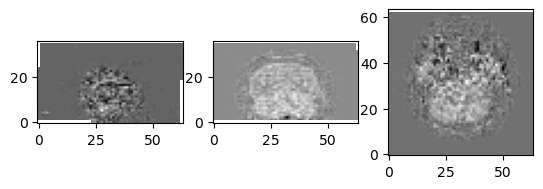

In [15]:
slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

## Look into charecteristics of image files

In [66]:
shape_list = []
name_list = []
dim_key_list = []
for file in gz_files:
    #name = gz_files
    loaded = nibabel.load(file)
    header_here = loaded.header
    dim = header_here['dim']
    shape = loaded.shape
    shape_list.append(shape)
    name_list.append(file)
    dim_key_list.append(header_here)
    

In [67]:
#name_list

In [69]:
df = pd.DataFrame(name_list, shape_list)
df.columns = ["name"]
df = df.reset_index()
df = df.rename(columns={'index': 'shape_of'})

In [72]:
df["dims"] = dim_key_list


In [48]:
len(df.shape_of[0])


3

In [64]:
df["len_shape"] = df["shape_of"].apply(lambda x: len(x))
df['string'] =  df["len_shape"].apply(lambda x: str(x))
nf = df.sort_values(by=['string'])
nf


,shape_of,name,len_shape,string
0,"(64, 64, 36)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
26,"(128, 128, 54)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
24,"(200, 256, 256)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
23,"(168, 256, 256)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
22,"(128, 128, 52)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
20,"(128, 128, 52)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
18,"(188, 256, 256)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
17,"(158, 256, 256)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
16,"(80, 80, 20)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3
12,"(180, 256, 256)",C:/Projects/brainspin/not_pushed/data_anonymiz...,3,3


In [59]:
df.len_shape.max()

4

OK so out images are either 3 or 4 dimensions, and if the 4th dimension is one we can just cut it off, I hope. but sometimes it's more than one. Let's see if it's the 1-2 elements in the dim key... but we need to asses that we should rewrite above entlyieffic. Nonetheless let's look at an example where this is confusing

In [80]:

t1_fn = gz_files[7]
t1_img = nibabel.load(t1_fn)
t1_hdr = t1_img.header
print(t1_hdr['dim'], t1_img.shape)

[  4 128 112  36  20   1   1   1] (128, 112, 36, 20)


In [81]:
t1_data = t1_img.get_fdata()
cut_data = t1_data[:, :, :, 0]
x_slice = cut_data[9, :, :]
y_slice = cut_data[:, 19, :]
z_slice = cut_data[:, :, 9]

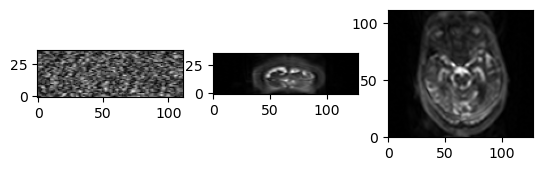

In [82]:
slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

Did I cutthe wrong dimension, looks like it is possible

In [97]:
t1_data = t1_img.get_fdata()
cut_data = t1_data[:, :, 0, :]
x_slice = cut_data[10, :, :]
y_slice = cut_data[:, 19, :]
z_slice = cut_data[:, :, 19]

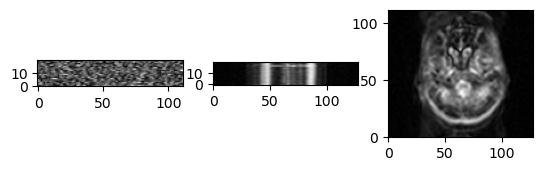

In [98]:
slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

A mystery...but time to work on a key through function anyways....

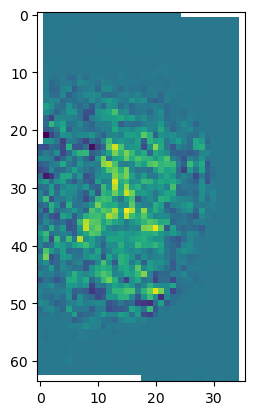

In [108]:
# Read the image 
t1_fn = gz_files[2]

t1_img = nibabel.load(t1_fn)


# get a NumPy array, without all the metadata
struct_arr = t1_img.get_fdata()
plt.imshow(struct_arr[15])

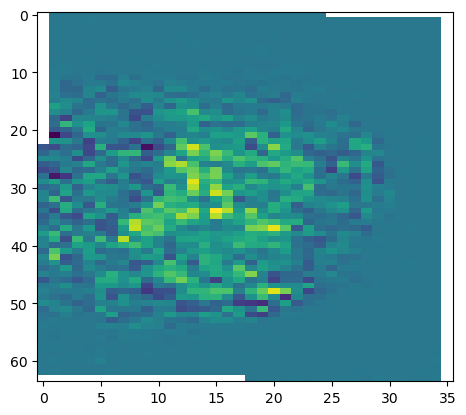

In [110]:
plt.imshow(struct_arr[15], aspect=0.5)

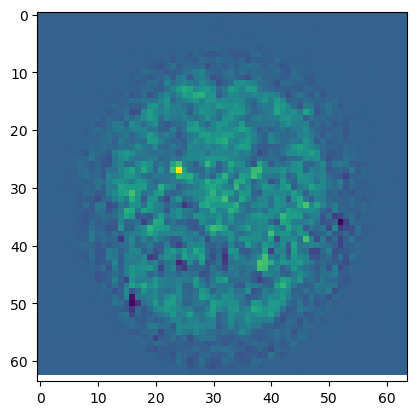

In [111]:
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[15])

In [112]:
def previous_slice():
    pass

def next_slice():
    pass

def process_key(event):
    if event.key == 'j':
        previous_slice()
    elif event.key == 'k':
        next_slice()

5

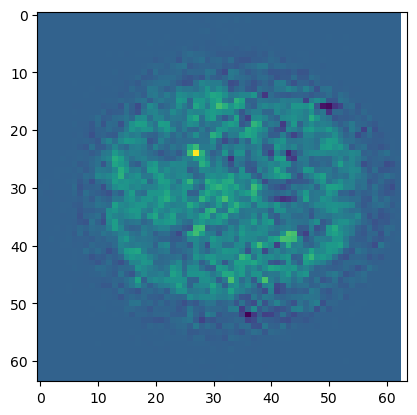

In [114]:
fig, ax = plt.subplots()
ax.imshow(struct_arr[..., 15])
fig.canvas.mpl_connect('key_press_event', process_key)

In [115]:
def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

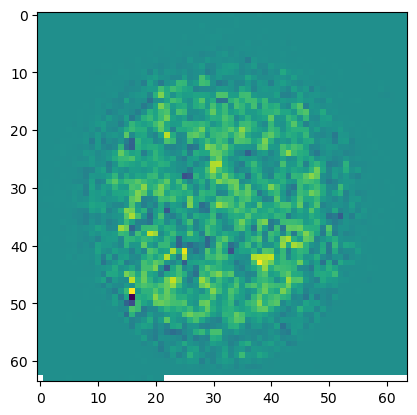

In [116]:
multi_slice_viewer(struct_arr2)

In [119]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
                
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

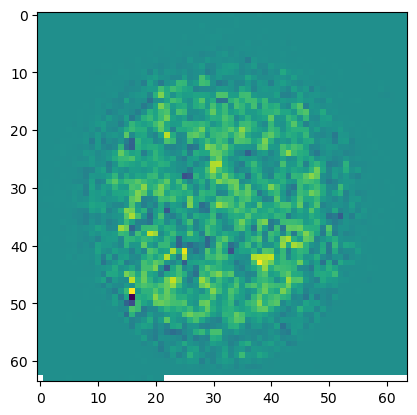

In [120]:
multi_slice_viewer(struct_arr2)